<a href="https://colab.research.google.com/github/imad10902/Quantium-Virtual-Internship/blob/main/Quantium_Virtual_Internship__Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
stores_data_df = pd.read_csv('QVI_data.csv')

In [115]:
stores_data_df.shape

(264834, 12)

In [116]:
stores_data_df[stores_data_df['STORE_NBR'].isin([77, 86, 88])].shape

(3974, 12)

In [117]:
print(stores_data_df['STORE_NBR'].unique()[0])
print(stores_data_df['STORE_NBR'].unique()[-1])
len(stores_data_df['STORE_NBR'].unique())

1
272


272

In [118]:
len(stores_data_df['TXN_ID'].unique())

263125

In [119]:
stores_data_df['TXN_ID'].duplicated().any()

True

In [120]:
stores_data_df.drop_duplicates(subset=['TXN_ID'], inplace=True, keep='first')
stores_data_df.shape

(263125, 12)

In [121]:
len(stores_data_df['DATE'].unique())

364

In [122]:
type(stores_data_df['DATE'].unique()[0])

str

In [123]:
from datetime import datetime

In [124]:
time_format_dates = []
for date in stores_data_df['DATE']:
  time_format_dates.append(datetime.strptime(date, '%Y-%m-%d'))
stores_data_df['Formatted_Dates'] = time_format_dates

In [125]:
type(stores_data_df['Formatted_Dates'].unique()[0])

numpy.datetime64

In [126]:
stores_data_df['Formatted_Dates_Months'] = stores_data_df['Formatted_Dates'].dt.to_period('M')
print(type(stores_data_df['Formatted_Dates_Months'].unique()[0]))

<class 'pandas._libs.tslibs.period.Period'>


In [127]:
total_sales_each_store = stores_data_df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

In [128]:
visitors_each_store = stores_data_df.groupby('STORE_NBR')['LYLTY_CARD_NBR'].nunique().reset_index(name = 'Number of Visitors')

In [129]:
transactions_each_store = stores_data_df.groupby('STORE_NBR').size().reset_index(name = 'Number of Transactions')
transactions_per_customer_col =  transactions_each_store['Number of Transactions']/visitors_each_store['Number of Visitors']
transactions_each_store['Number of Transactions per Customer'] = transactions_per_customer_col
transactions_per_customer_each_store = transactions_each_store.drop('Number of Transactions', axis = 1)

In [130]:
total_sales_each_store_monthly = stores_data_df.groupby(['STORE_NBR', 'Formatted_Dates_Months'])['TOT_SALES'].sum().reset_index()

In [131]:
visitors_each_store_monthly = stores_data_df.groupby(['STORE_NBR', 'Formatted_Dates_Months'])['LYLTY_CARD_NBR'].nunique().reset_index(name='Number of Visitors')

In [132]:
transactions_each_store_monthly = stores_data_df.groupby(['STORE_NBR', 'Formatted_Dates_Months']).size().reset_index(name = "Number of Transactions")
transactions_per_customer_each_store_monthly_col = transactions_each_store_monthly['Number of Transactions']/visitors_each_store_monthly['Number of Visitors']
transactions_each_store_monthly['Number of Transactions per Customer'] = transactions_per_customer_each_store_monthly_col
transactions_per_customer_each_store_monthly = transactions_each_store_monthly.drop('Number of Transactions', axis = 1)

In [133]:
transactions_per_customer_each_store_monthly

,STORE_NBR,Formatted_Dates_Months,Number of Transactions per Customer
0,1,2018-07,1.061224
1,1,2018-08,1.023810
2,1,2018-09,1.050847
3,1,2018-10,1.022727
4,1,2018-11,1.021739
...,...,...,...
3164,272,2019-02,1.066667
3165,272,2019-03,1.060000
3166,272,2019-04,1.018519
3167,272,2019-05,1.176471


In [ ]:
total_sales_trial_stores_monthly = total_sales_each_store_monthly[total_sales_each_store_monthly['STORE_NBR'].isin([77, 86, 88])]
total_sales_trial_stores_monthly['Formatted_Dates_Months']= total_sales_trial_stores_monthly['Formatted_Dates_Months'].astype(str)
visitors_trial_stores_monthly = visitors_each_store_monthly[visitors_each_store_monthly['STORE_NBR'].isin([77, 86, 88])]
visitors_trial_stores_monthly['Formatted_Dates_Months']= visitors_each_store_monthly['Formatted_Dates_Months'].astype(str)

In [135]:
sales_per_month_77_trial_store = total_sales_trial_stores_monthly[total_sales_trial_stores_monthly['STORE_NBR']==77].set_index('Formatted_Dates_Months')
sales_per_month_77_trial_store.drop('STORE_NBR', axis = 1, inplace = True)
sales_per_month_86_trial_store = total_sales_trial_stores_monthly[total_sales_trial_stores_monthly['STORE_NBR']==86].set_index('Formatted_Dates_Months')
sales_per_month_86_trial_store.drop('STORE_NBR', axis = 1, inplace = True)
sales_per_month_88_trial_store = total_sales_trial_stores_monthly[total_sales_trial_stores_monthly['STORE_NBR']==88].set_index('Formatted_Dates_Months')
sales_per_month_88_trial_store.drop('STORE_NBR', axis = 1, inplace = True)

In [136]:
visitors_per_month_77_trial_store = visitors_trial_stores_monthly[visitors_trial_stores_monthly['STORE_NBR']==77].set_index('Formatted_Dates_Months')
visitors_per_month_77_trial_store.drop('STORE_NBR', axis = 1, inplace = True)
visitors_per_month_86_trial_store = visitors_trial_stores_monthly[visitors_trial_stores_monthly['STORE_NBR']==86].set_index('Formatted_Dates_Months')
visitors_per_month_86_trial_store.drop('STORE_NBR', axis = 1, inplace = True)
visitors_per_month_88_trial_store = visitors_trial_stores_monthly[visitors_trial_stores_monthly['STORE_NBR']==88].set_index('Formatted_Dates_Months')
visitors_per_month_88_trial_store.drop('STORE_NBR', axis = 1, inplace = True)

In [137]:
total_sales_control_stores_monthly = total_sales_each_store_monthly[~total_sales_each_store_monthly['STORE_NBR'].isin([77, 86, 88])].copy()
visitors_control_stores_monthly = visitors_each_store_monthly[~visitors_each_store_monthly['STORE_NBR'].isin([77, 86, 88])].copy()


In [138]:
# Clustering similar control stores together and reducing them to 10. then taking 1 from each cluster to make comparison easy to understand

In [139]:
data = []
def add_months(df, for_the):

  date_range = pd.date_range(start='2018-07-01', end='2019-06-01', freq='MS')
  new_date_range = date_range.to_period('M')

  complete_df = pd.DataFrame({'Formatted_Dates_Months': new_date_range})

  merged_df = pd.merge(complete_df, df, on='Formatted_Dates_Months', how='left')

  if(for_the == 'sales'):
    merged_df['TOT_SALES'].fillna(0, inplace=True)
    data.append(merged_df['TOT_SALES'].values)
  else:
    merged_df['Number of Visitors'].fillna(0, inplace=True)
    data.append(merged_df['Number of Visitors'].values)


In [140]:
for i in total_sales_control_stores_monthly['STORE_NBR'].unique():
  add_months(total_sales_control_stores_monthly[total_sales_control_stores_monthly['STORE_NBR']==i], 'sales')

In [141]:
data_sales = np.array(data)
data.clear()

In [142]:
for i in visitors_control_stores_monthly['STORE_NBR'].unique():
  add_months(visitors_control_stores_monthly[visitors_control_stores_monthly['STORE_NBR']==i], 'visitors')
data_visitors = np.array(data)
data.clear()

In [143]:
from sklearn.cluster import KMeans

In [ ]:
all_arrays_np = np.array(data_sales)
num_groups = 10
kmeans = KMeans(n_clusters=num_groups, random_state=42)
group_labels = kmeans.fit_predict(all_arrays_np)
groups = {}
for i, label in enumerate(group_labels):
    if label not in groups:
        groups[label] = []
    groups[label].append(data_sales[i])
stores = {}
for label in range(0,10):
  stores[label] = groups[label][0]

In [145]:
sales_control_stores_df = pd.DataFrame(stores)
date_range = pd.date_range(start="2018-07-01", end="2019-06-01", freq='MS')
months = date_range.to_period('M')
sales_control_stores_df['Formatted_Dates_Months'] = months
sales_control_stores_df
sales_control_stores_df['Formatted_Dates_Months'] = sales_control_stores_df['Formatted_Dates_Months'].astype(str)
sales_control_stores_df.set_index('Formatted_Dates_Months', inplace=True)

In [ ]:
all_arrays_np = np.array(data_visitors)
num_groups = 10
kmeans = KMeans(n_clusters=num_groups, random_state=42)
group_labels = kmeans.fit_predict(all_arrays_np)
groups = {}
for i, label in enumerate(group_labels):
    if label not in groups:
        groups[label] = []
    groups[label].append(data_visitors[i])
stores1 = {}
for label in range(0,10):
  stores1[label] = groups[label][0]

In [147]:
visitors_control_stores_df = pd.DataFrame(stores1)
date_range = pd.date_range(start="2018-07-01", end="2019-06-01", freq='MS')
months = date_range.to_period('M')
visitors_control_stores_df['Formatted_Dates_Months'] = months
visitors_control_stores_df
visitors_control_stores_df['Formatted_Dates_Months'] = visitors_control_stores_df['Formatted_Dates_Months'].astype(str)
visitors_control_stores_df.set_index('Formatted_Dates_Months', inplace=True)

In [148]:
def line_plot(df1, x_name, y_name, title_, label_name, df2, for_the):
  plt.figure(figsize=(10,6))
  for col in df2.columns:
    plt.plot(df2.index, df2[col], linestyle='-', color='skyblue', marker='o')
  if for_the=='sales':
    plt.plot(df1.index, df1['TOT_SALES'], linestyle='-', color = 'red', marker = 'o', label=label_name)
  else:
    plt.plot(df1.index, df1['Number of Visitors'], linestyle='-', color = 'brown', marker = 'o', label=label_name)

  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.title(title_)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

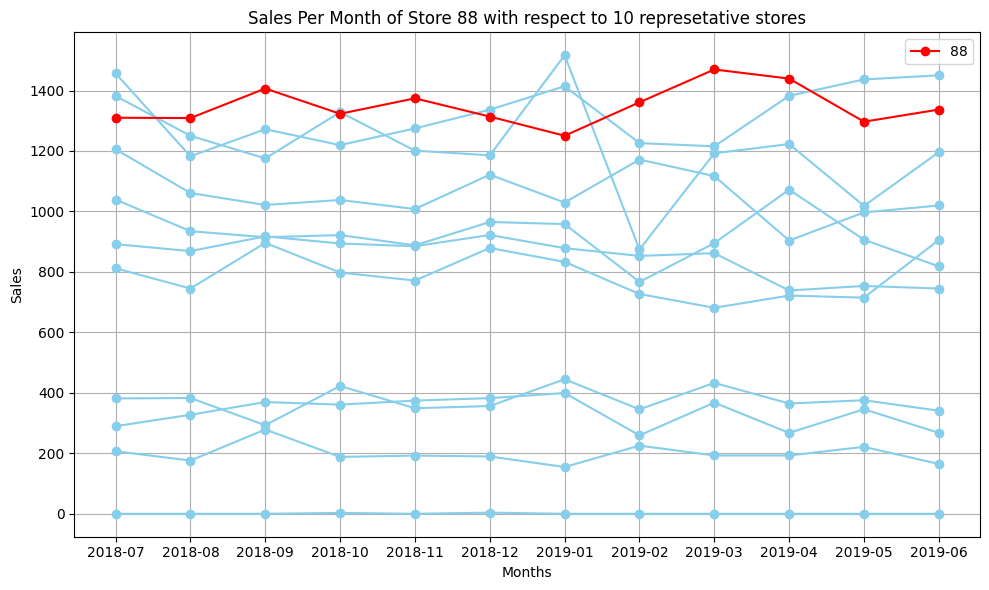

In [149]:
line_plot(sales_per_month_88_trial_store, 'Months', 'Sales', 'Sales Per Month of Store 88 with respect to 10 represetative stores', '88', sales_control_stores_df, 'sales')

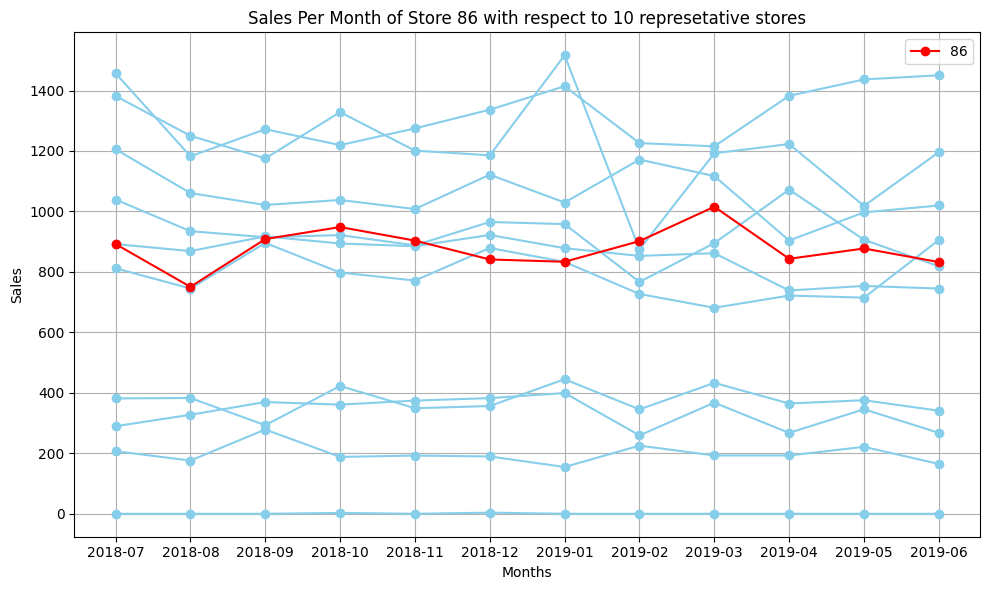

In [150]:
line_plot(sales_per_month_86_trial_store, 'Months', 'Sales', 'Sales Per Month of Store 86 with respect to 10 represetative stores', '86', sales_control_stores_df, 'sales')

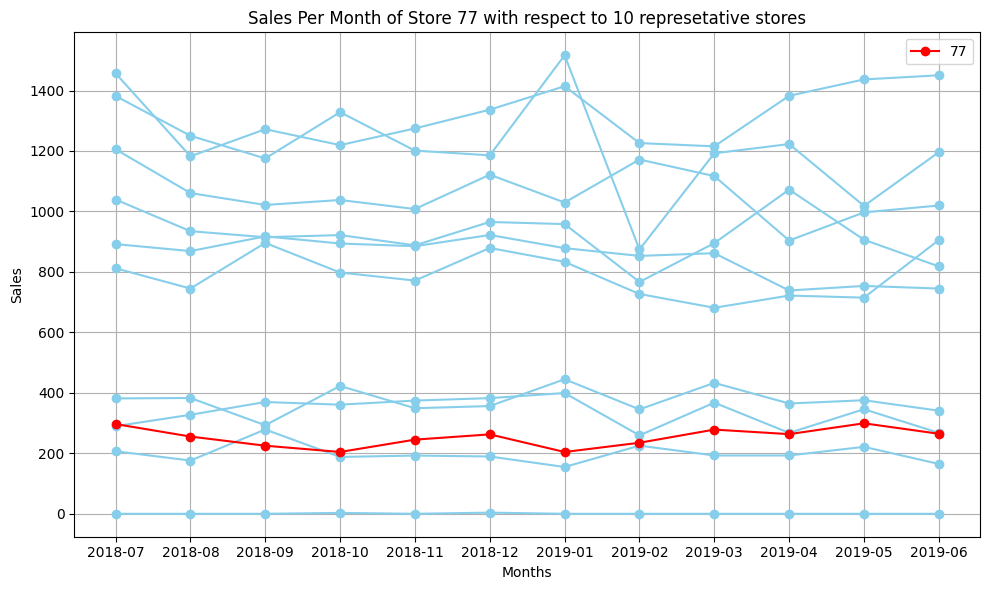

In [151]:
line_plot(sales_per_month_77_trial_store, 'Months', 'Sales', 'Sales Per Month of Store 77 with respect to 10 represetative stores', '77', sales_control_stores_df, 'sales')

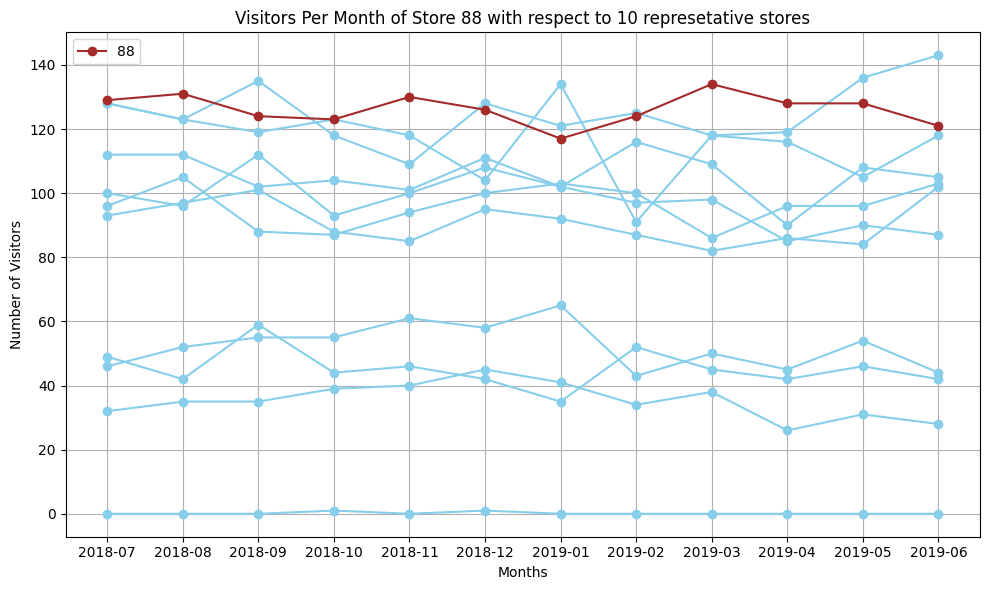

In [152]:
line_plot(visitors_per_month_88_trial_store, 'Months', 'Number of Visitors', 'Visitors Per Month of Store 88 with respect to 10 represetative stores', '88', visitors_control_stores_df, 'visitors')

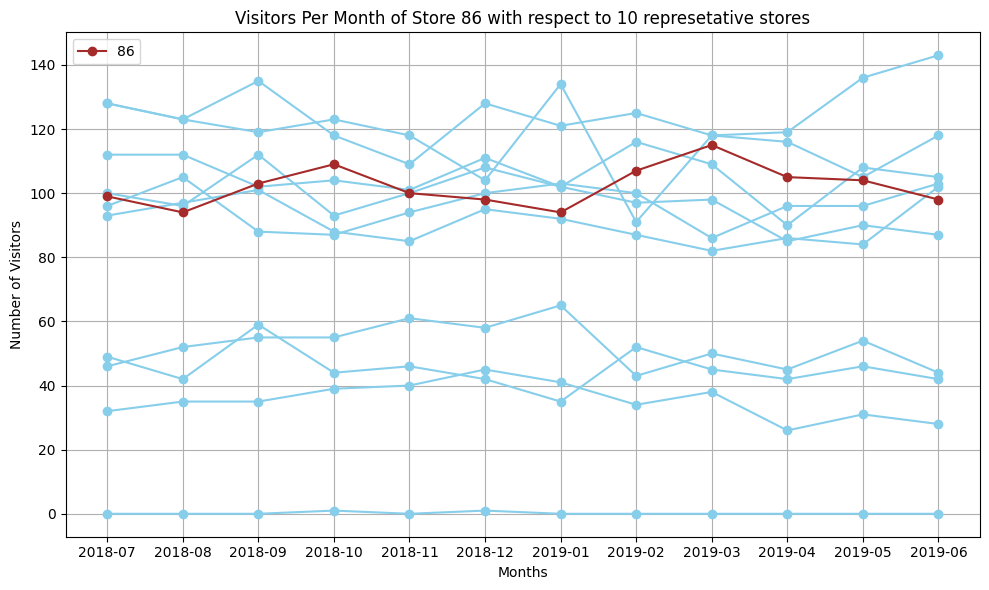

In [153]:
line_plot(visitors_per_month_86_trial_store, 'Months', 'Number of Visitors', 'Visitors Per Month of Store 86 with respect to 10 represetative stores', '86', visitors_control_stores_df, 'visitors')

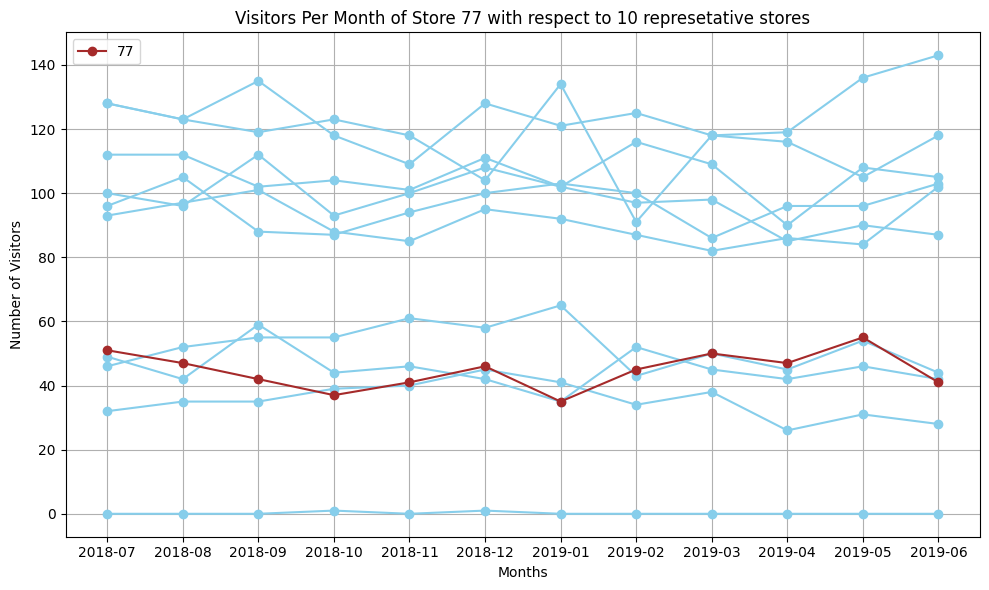

In [154]:
line_plot(visitors_per_month_77_trial_store, 'Months', 'Number of Visitors', 'Visitors Per Month of Store 77 with respect to 10 represetative stores', '77', visitors_control_stores_df, 'visitors')

In [155]:
# It is clear from the plots that trial store 88 performs the best. It has sales and visitors close to the highest-selling and
# visited control stores. It does not need any changes. Trial store 86 performs well, surpassing the average of control
# stores in both sales and the number of visitors. However, trial store 77 does not perform well in either
# aspect, with lower sales and fewer visitors compared to other stores.